# Projet - Online shoppers intention

## Etape 1 : Imports

In [1]:
# Affichage avec la bibliothèque graphique intégrée à Notebooks
%matplotlib inline

# Importer une libraire de visualisation de données Python 
# basée sur matplotlib
import seaborn                   as sns
import pandas                    as pd
from   sklearn.metrics           import confusion_matrix,accuracy_score
import matplotlib.pyplot         as plt

import sys
from   sklearn.model_selection   import GridSearchCV
from   sklearn.neighbors         import KNeighborsClassifier
import pickle
import numpy                     as np

## Etape 2 : Téléchargement des données

In [2]:
# Téléchargement en dataframe du fichier csv online_shoppers_intention.csv
online_shoppers_intention = pd.read_csv("online_shoppers_intention.csv")

# Affichage des premières lignes du dataframe online_shoppers_intention
online_shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Etape 3 : Découverte des données

In [3]:
# On filtre le dataframe pour avoir uniquement les lignes 
# avec un taux de specialDay supérieur à 0.50
online_shoppers_intention[online_shoppers_intention.SpecialDay>0.50]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
20,0,0.0,0,0.0,8,136.166667,0.000000,0.008333,0.0,1.0,Feb,2,2,5,1,Returning_Visitor,True,False
23,0,0.0,0,0.0,2,15.000000,0.000000,0.100000,0.0,0.8,Feb,2,4,1,3,Returning_Visitor,False,False
37,2,18.0,0,0.0,5,298.000000,0.000000,0.028571,0.0,0.8,Feb,2,2,8,4,Returning_Visitor,False,False
38,0,0.0,0,0.0,7,63.000000,0.028571,0.071429,0.0,0.6,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,0,0.0,0,0.0,36,631.306863,0.021143,0.047901,0.0,0.8,May,2,2,3,6,Returning_Visitor,False,False
5448,3,35.5,0,0.0,14,241.769231,0.000000,0.020417,0.0,0.6,May,3,2,3,2,Returning_Visitor,False,False
5450,2,42.0,0,0.0,17,275.702381,0.040000,0.060000,0.0,0.6,May,3,2,8,2,Returning_Visitor,False,False
5453,2,76.0,1,79.0,35,2072.666667,0.007207,0.031081,8.1,0.8,May,2,4,7,2,Returning_Visitor,False,False


In [4]:
# Il y a 830 lignes qui présentent un taux de SpecialDay supéieur à 0.50

In [5]:
# On filtre le dataframe pour avoir uniquement les lignes dont le VisitorType est différent de "Returning_Visitor"
# (la catégorie Returning_Visitor représente beaucoup de lignes)
mask = online_shoppers_intention.VisitorType!="Returning_Visitor"
online_shoppers_intention[mask]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
93,0,0.0,0,0.0,13,649.250000,0.000000,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
196,2,56.0,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
198,0,0.0,0,0.0,17,840.233333,0.000000,0.001667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,False,True
199,3,94.0,2,125.0,55,1970.844805,0.000000,0.001724,96.255116,0.0,Mar,2,4,1,2,New_Visitor,True,True
202,5,218.0,0,0.0,13,284.500000,0.000000,0.004167,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,0,0.0,0,0.0,2,40.500000,0.000000,0.100000,0.000000,0.0,Dec,1,1,3,3,Other,False,False
12296,0,0.0,0,0.0,5,108.000000,0.000000,0.040000,0.000000,0.0,Dec,2,2,1,2,New_Visitor,False,False
12297,0,0.0,0,0.0,6,139.750000,0.033333,0.066667,0.000000,0.0,Nov,2,2,3,2,New_Visitor,False,False
12317,3,100.5,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,Dec,2,2,3,2,New_Visitor,False,False


## Etape 4 : Etude des colonnes

### 4.1. Suppression de colonnes

In [6]:
# Pour certaines colonnes, nous n'avons pas assez d'informations dans la description des données. 
# Nous ne pouvons pas les exploiter. Nous allons donc les supprimer. Il s'agit des colonnes :
# BounceRates, ExitRates, PageValues et TrafficType.

online_shoppers_intention = online_shoppers_intention.drop(['BounceRates','ExitRates','PageValues', 'TrafficType'], axis=1)
online_shoppers_intention

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.0,Feb,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.0,Feb,2,2,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.0,Feb,4,1,9,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.0,Feb,3,2,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.0,Feb,3,3,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.0,Dec,4,6,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.0,Nov,3,2,1,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.0,Nov,3,2,1,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.0,Nov,2,2,3,Returning_Visitor,False,False


In [7]:
# On affiche la forme du dataframe online_shoppers_intention
online_shoppers_intention.shape

(12330, 14)

In [8]:
# Le dataframe online_shoppers_intention contient 14 colonnes et 12330 lignes

### 4.2. Ajout de nouvelles colonnes

In [9]:
# On crée une nouvelle colonne qui contient l'index de chaque mois 
# et on ajoute cette colonne dans un nouveau dataframe nommé online_shoppers_intention_edited

index_months = {
    'Feb'  : 2 , 
    'Mar'  : 3 ,
    'May'  : 5 ,
    'June' : 6 ,
    'Jul'  : 7 ,
    'Aug'  : 8 ,
    'Sep'  : 9 ,
    'Oct'  : 10,
    'Nov'  : 11,
    'Dec'  : 12
}

online_shoppers_intention_edited = online_shoppers_intention.copy()
online_shoppers_intention_edited["MonthNumber"] = online_shoppers_intention_edited.Month.map(index_months)

In [10]:
online_shoppers_intention_edited.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,MonthNumber
0,0,0.0,0,0.0,1,0.000000,0.0,Feb,1,1,1,Returning_Visitor,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.0,Feb,2,2,1,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.0,Feb,4,1,9,Returning_Visitor,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.0,Feb,3,2,2,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.0,Feb,3,3,1,Returning_Visitor,True,False,2


In [11]:
# On crée une nouvelle colonne qui contient la somme du nombre total de pages visitées au cours de la session,
# c'est-à-dire la somme des colonnes Administrative, Informational et ProductRelated
# Et on ajoute cette colonne dans le dataframe online_shoppers_intention_edited

online_shoppers_intention_edited["TotalPages"] = online_shoppers_intention_edited.Administrative + online_shoppers_intention_edited.Informational + online_shoppers_intention_edited.ProductRelated

In [12]:
# On crée une nouvelle colonne qui contient la somme du temps passé sur les pages visitées au cours de la session,
# c'est-à-dire la somme des colonnes Administrative_Duration, Informational_Duration et ProductRelated_Duration
# Et on ajoute cette colonne dans le dataframe online_shoppers_intention_edited

online_shoppers_intention_edited["TotalDuration"] = online_shoppers_intention_edited.Administrative_Duration + online_shoppers_intention_edited.Informational_Duration + online_shoppers_intention_edited.ProductRelated_Duration

In [13]:
online_shoppers_intention_edited.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,MonthNumber,TotalPages,TotalDuration
0,0,0.0,0,0.0,1,0.000000,0.0,Feb,1,1,1,Returning_Visitor,False,False,2,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.0,Feb,2,2,1,Returning_Visitor,False,False,2,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.0,Feb,4,1,9,Returning_Visitor,False,False,2,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.0,Feb,3,2,2,Returning_Visitor,False,False,2,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.0,Feb,3,3,1,Returning_Visitor,True,False,2,10,627.500000


In [14]:
# On trie le dataframe online_shoppers_intention_edited sur le monthNumber
online_shoppers_intention_edited = online_shoppers_intention_edited.sort_values("MonthNumber")

## Etape 5 : Datavisualisation

### 5.1. Sessions ayant abouti à un achat

In [15]:
# La dernière colonne Revenue contient des valeurs binaires (True ou False) 
# indiquant si la session considérée (qui correspond à une ligne) a abouti à un achat ou non

In [16]:
# On récupère dans un dataframe uniquements les lignes concernant 
# une session ayant abouti à un achat (c'est-à-dire les lignes ayant comme valeur True pour la colonne Revenue)
df_achat_abouti = online_shoppers_intention_edited[online_shoppers_intention_edited.Revenue]

In [17]:
# On visualise les premières lignes du nouveau dataframe
df_achat_abouti.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,MonthNumber,TotalPages,TotalDuration
101,4,61.000000,0,0.0,19,607.000000,1.0,Feb,1,1,7,Returning_Visitor,True,True,2,23,668.000000
76,10,1005.666667,0,0.0,36,2111.341667,0.0,Feb,2,6,1,Returning_Visitor,False,True,2,46,3117.008334
65,3,87.833333,0,0.0,27,798.333333,0.8,Feb,2,2,3,Returning_Visitor,False,True,2,30,886.166667
1463,10,1559.750000,1,7.0,41,1663.761905,0.0,Mar,1,1,1,Returning_Visitor,False,True,3,52,3230.511905
1466,1,0.000000,1,60.5,46,1038.916667,0.0,Mar,2,2,6,Returning_Visitor,False,True,3,48,1099.416667


In [18]:
# On visualise la forme du nouveau dataframe
df_achat_abouti.shape

(1908, 17)

In [19]:
# Il y a donc 1908 lignes concernant une session ayant abouti à un achat sur 12330 lignes au total
# soit environ 15% des lignes totales
# Ainsi, la majorité des lignes concerne des sessions n'ayant pas abouti à un achat

### 5.2. Pivot table sur la colonne SpecialDay

In [20]:
# Nous voulons maintenant faire un tableau croisé à partir du
# tableau des achats aboutis pour afficher le nombre de SpecialDay moyen par mois (Month)
# et nous remplissons les valeurs inconnues par un 0

In [21]:
tab = df_achat_abouti.pivot_table(index=["Month"],
                                          values = ["SpecialDay"],
                                          aggfunc="mean",
                                          fill_value = 0)

In [22]:
# On trie ce tableau croisé par nombre de SpecialDay
tab.sort_values("SpecialDay", ascending=False)

,SpecialDay
Month,
Feb,0.600000
May,0.116164
Aug,0.000000
Dec,0.000000
Jul,0.000000
June,0.000000
Mar,0.000000
Nov,0.000000
Oct,0.000000


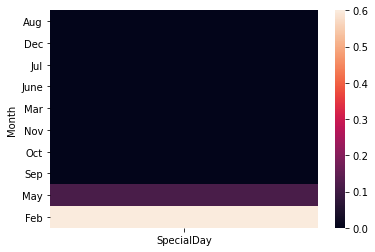

In [23]:
sns.heatmap(tab.sort_values("SpecialDay"))

In [24]:
# On remarque qu'il n'y a qu'en mai et en février qu'il y a eu des SpecialDay (lors desquels des achats ont été effectués)
# En mai, les achats ayant abouti étaient à environ 11% proche d'un SpecialDay
# En février, les achats ayant abouti étaient à environ 60% proche d'un SpecialDay

In [25]:
# Sur le heatmap, on voit que plus les couleurs sont claires, 
# plus il y a eu de sessions avec une date d'achat proche d'un SpecialDay

### 5.3. Graphique/Histogramme sur le nombre d'achats par mois

In [26]:
# Nous voulons maintenant visualiser le nombre d'achats effectués par mois

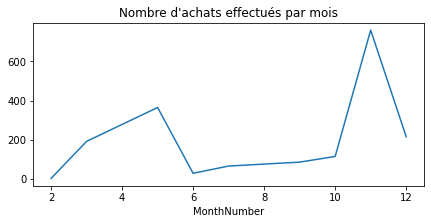

In [27]:
title = "Nombre d'achats effectués par mois"
_ = df_achat_abouti.groupby("MonthNumber")["Revenue"].count()
#_ = _.sort_values()
_.plot(title = title, figsize=(7,3))
#plt.xticks(range(0,len(_.index)), _.index)
plt.show()

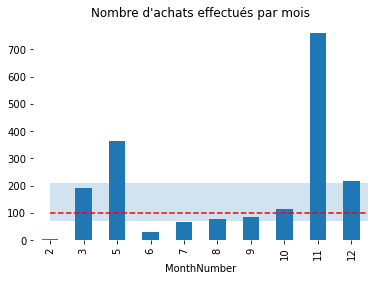

In [28]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

title = "Nombre d'achats effectués par mois"

## a voir si on arrive a le faire avec le Month (sorted by MonthNumber)
to_plot = df_achat_abouti.groupby("MonthNumber")["Revenue"].count()
ax = to_plot.plot.bar(title = title)
ax.hlines(to_plot.median(), 0, 24, colors="red", linestyles="dashed")
#0, 24 => la ligne va de h=0 à h=24 (toute la largeur)
despine_ax(ax)
ax.fill_between(range(24), to_plot.quantile(0.25), to_plot.quantile(0.75), alpha=0.2)
#25 et 75 percentile, alpha=0.2, c'est pour la transparence

In [29]:
# On voit que contrairement à ce que l'on aurait pu penser, il n'y a pas eu plus d'achats 
# durant les mois ayant le plus de Special Days

### 5.4. Comparaison du nombre d'achats effectués par nombre de sites visités

In [30]:
from bokeh.plotting  import figure, show    # show() : montre le graphique
from bokeh.io        import output_notebook # Configurez l'état de sortie par défaut pour générer une sortie dans les cellules
from bokeh.transform import linear_cmap
from bokeh.palettes  import Spectral6

output_notebook() # initialise le notebook pour la visualisation des graphiques produits

Loading BokehJS ...

In [31]:
# On créé une fonction pour afficher un graphique coloré
def plot_revenue_group_by(column_name):
    _ = df_achat_abouti.groupby(column_name)["Revenue"].count()
    _2 = _.reset_index() 

    mapper = linear_cmap (field_name = "Revenue", # a field name to configure DataSpec with
                          palette = Spectral6,    # a list of colors to use for colormapping
                          low = min(_2.Revenue),  # a minimum value of the range to map into the palette.
                          high = max(_2.Revenue)  # a maximum value of the range to map into the palette.
                         )

    p = figure()
    p.square(x=column_name, y="Revenue", source=_2, color=mapper)
    show(p)

In [32]:
# Nous voulons maintenant visualiser le nombre d'achats effectués par nombre de sites de produits visités

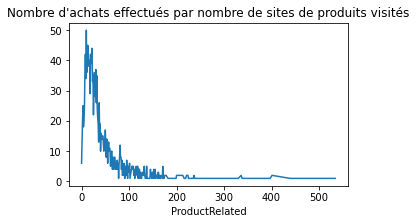

In [33]:
title = "Nombre d'achats effectués par nombre de sites de produits visités"
_ = df_achat_abouti.groupby("ProductRelated")["Revenue"].count()
_.plot(title = title, figsize=(5,3))
plt.show()

In [34]:
plot_revenue_group_by("ProductRelated")

In [35]:
# On voit que le maximum d’achats effectués est atteint vers 20 sites de produits visités. 
# A partir de 50 sites de produits visités, il y a de moins en moins d’achats effectués. 
# Et aux alentours de 170 sites de produits visités, le nombre d’achats effectués est proche de 0.

In [36]:
# Nous voulons maintenant visualiser le nombre d'achats effectués par nombre de sites adminsitratifs visités

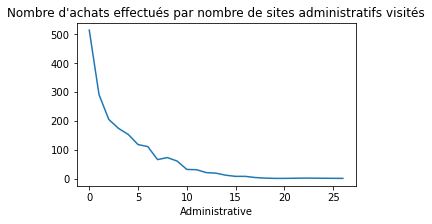

In [37]:
title = "Nombre d'achats effectués par nombre de sites administratifs visités"
_ = df_achat_abouti.groupby("Administrative")["Revenue"].count()
_.plot(title = title, figsize=(5,3))
plt.show()

In [38]:
plot_revenue_group_by("Administrative")

In [39]:
# On remarque que le maximum d'achats effectués est atteint pour 0 site administratif visité.
# Nous comprenons donc que les visites sur les sites administratifs n'ont pas d'incidence sur l'achat d'un produit. 

In [40]:
# Nous voulons maintenant visualiser le nombre d'achats effectués par nombre de sites d'informations visités

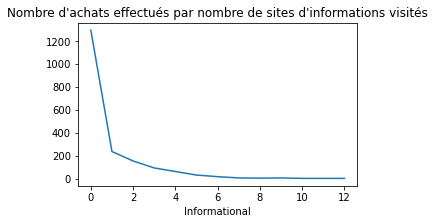

In [41]:
title = "Nombre d'achats effectués par nombre de sites d'informations visités"
_ = df_achat_abouti.groupby("Informational")["Revenue"].count()
_.plot(title = title, figsize=(5,3))
plt.show()

In [42]:
plot_revenue_group_by("Informational")

In [43]:
# On remarque que le maximum d'achats effectués est atteint pour 0 site d'informations visité.
# Nous comprenons donc que les visites sur les sites d'informations n'ont pas d'incidence sur l'achat d'un produit. 

In [44]:
# Ainsi, comme on pouvait s’y attendre, les personnes qui ont visité un site de produits 
# sont bien plus susceptibles de faire un achat.

## Etape 6 : Fonctions utiles

### 6.1. Matrice de confusion

In [45]:
from sklearn.metrics import plot_confusion_matrix

In [46]:
def draw_confusion_matrix(y_test, classifier, title):
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

### 6.2. Coube ROC

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [48]:
def draw_roc_curve(fitted_c, x_test, y_test, title):
    """
    Créé et affiche la courbe ROC des données de test X et Y selon un classifieur (SVM, KNN, RF).
    Permet de représenter l'évolution de la vitesse d'apprentissage du classifieur.
    Taux de vrais-positifs en fonction du taux de faux-négatif.
    Plus l'aire sous la courbe est grande, plus le classifieur est idéal.
    """
    c                                        = fitted_c
    probas                                   = c.predict_proba(x_test)
    false_positive_rate, recall_, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc                                  = auc(false_positive_rate, recall_)
    
    plt.title  ('ROC %.2f %s'%(roc_auc, title))
    plt.legend (loc="lower right")
    plt.plot   ([0,1],[0,1], "r--")
    plt.plot   (false_positive_rate, recall_, 'b', label='AUC = %.2f'%roc_auc)
    plt.xlim   ([0.0,1.1])
    plt.ylim   ([0.0,1.1])
    plt.ylabel ('Recall')
    plt.xlabel ('Fall-out')
    plt.show()

### 6.3. Impression de l'heure de la machine

In [49]:
import time
import datetime

In [50]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    t = datetime.datetime.now().time()
    return time.time()

### Nous allons maintenant tester des modèles avec le dataframe online_shoppers_intention non modifié, puis avec le dataframe modifié c'est-à-dire online_shoppers_intention_edited.

## Etape 7 : Modèles avec online_shoppers_intention

In [51]:
# Créer un nouveau dataframe df_online_shoppers qui reprend le dataframe online_shoppers_intention
# dans lequel on retire les lignes contenant des valeurs NA 
# Le paramètre "inplace = False" signifie que l'on ne souhaite pas modifier le dataframe d'origine online_shoppers_intention

df_online_shoppers = online_shoppers_intention.dropna(axis = 0, inplace = False)
df_online_shoppers.shape

(12330, 14)

In [52]:
# Pour exécuter les modèles, nous avons besoin que nos variables soient des nombres ou des booléens
# Il faut remplacer les variables qui sont des chaînes de caractères

In [53]:
# On transforme la colonne Month avec les index des mois
df_online_shoppers["Month"] = online_shoppers_intention.Month.map(index_months)

In [54]:
# On transforme Visitor_type : Returning_Visitor en 0, New_Visitor en 1 et Other en 2
df_online_shoppers['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[0,1,2], inplace = True)

In [55]:
df_online_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.0,2,1,1,1,0,False,False
1,0,0.0,0,0.0,2,64.000000,0.0,2,2,2,1,0,False,False
2,0,0.0,0,0.0,1,0.000000,0.0,2,4,1,9,0,False,False
3,0,0.0,0,0.0,2,2.666667,0.0,2,3,2,2,0,False,False
4,0,0.0,0,0.0,10,627.500000,0.0,2,3,3,1,0,True,False


### 7.1. Séparer le jeu d'apprentissage du jeu de test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Y = df_online_shoppers['Revenue']
X = df_online_shoppers.drop('Revenue', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9247, 13)
(3083, 13)
(9247,)
(3083,)


In [59]:
# On crée un dictionnaire dans lequel on mettra les résultats de nos modèles 
# afin de pouvoir comparer
modeles = {}

### 7.2. KNeighbors Classifier

In [60]:
def knn_grid_search(df, Y, key):
    """
    Réglage des hyper-paramètres du classifieur K Nearest Neighbors
    Plusieurs hyper-paramètres sont disponibles
    L'entrainement du modèle va s'effectuer sur plusieurs paramètres
    Le best_score représentera le modèle avec les meilleurs paramètres
    """

    parameters = {  "n_neighbors"    : [2, 3, 5, 8 , 10]                         , 
                    "weights"        : ['uniform', 'distance']                   ,
                    "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
                    "leaf_size"      : [1, 3]                                    }
    
    
    grid_type = "knn_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    grid    = GridSearchCV(KNeighborsClassifier(), {}, verbose=1, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1

    
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()
    modeles[key] = {"score" : grid.best_score_, "estimator" : grid.best_estimator_, "params" : grid.best_params_}

    return grid

In [61]:
start_time = print_time()

knn = knn_grid_search(X_train, Y_train, "KNN")

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 knn_grid_search
{'n_neighbors': [2, 3, 5, 8, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 3]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 best_score_ = 0.78 with =  KNeighborsClassifier() 

Duration time : 1.0837104320526123


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [62]:
type(knn.predict(X_test))

numpy.ndarray


[[0.94446587 0.05553413]
 [0.9244898  0.0755102 ]]


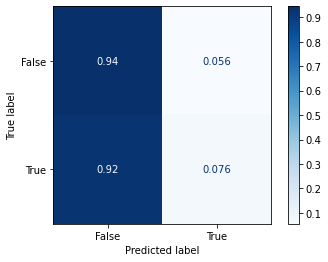

In [63]:
# Matrice de confusion des données X_test sur lesquelles on fait la prédiction et des données Y_test.
draw_confusion_matrix(Y_test, knn.best_estimator_, "")

In [64]:
# La  matrice de confusion indique que les valeurs 0 (achats non aboutis) sont bien prédites 
# mais les valeurs 1 (achats aboutis) ne sont pas bien prédites

No handles with labels found to put in legend.


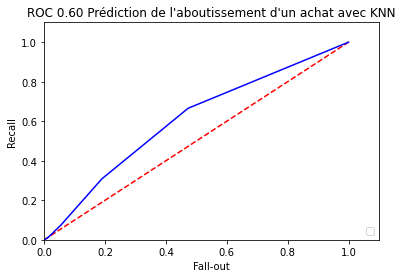

In [65]:
draw_roc_curve(knn, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec KNN")

### 7.3. C-Support Vector Classification

In [66]:
import sys
from   sklearn.model_selection   import GridSearchCV
from   sklearn.svm               import SVC
import pickle

In [67]:
# Pour le C-Support Vector Classification, nous allons tester différents paramètres.
# Les fonctions définies ci-dessous svm_grid_search, svm_grid_search2 et svm_grid_search3
# permettent de faire varier les paramètres.

In [110]:
def svm_grid_search(df, Y, key):
    """
    Réglage des hyper-paramètres du classifieur Support Vector Machine
    Notamment : 'C', 'kernel' et 'gamma'
    """
    parameters = {  "C"              : [1.0, 0.5],# 0.1, 2]              , 
                    "kernel"         : ['rbf'],# 'poly'],# 'sigmoid']    ,
                    "degree"         : [2, 3],# 4,5,6]                   ,
                    "gamma"          : [0.01, 0.1],# 0.001, 0.5]         ,
                    "coef0"          : [0.0]                             , 
                    "shrinking"      : [True]                            , 
                    "probability"    : [True]                            , 
                    "tol"            : [0.001]                           , 
                    "cache_size"     : [10]                              , 
                    "class_weight"   : [None]                            , 
                    #"verbose"        : [True]                            ,
                    "max_iter"       : [-1]                              , 
                    "random_state"   : [None]                            }
   
    
    
    print ("-"*30, "\n svm_grid_search"); sys.stdout.flush()
    
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    grid    = GridSearchCV(SVC(), parameters, verbose=1, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : 
        print ("[svm_grid_search - 2] : %s"%e) ; 
        print ("x_train, y_train : ", x_train, y_train)

    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()
    modeles[key] = {"score" : grid.best_score_, "estimator" : grid.best_estimator_, "params" : grid.best_params_}

    return grid.best_estimator_

In [106]:
start_time = print_time()

svm = svm_grid_search(X_train, Y_train, "SVM")

end_time = print_time()

print ("\nDuration time :", end_time - start_time)

------------------------------ 
 svm_grid_search
{'C': [1.0, 0.5], 'kernel': ['rbf'], 'degree': [2], 'gamma': [0.01, 0.1], 'coef0': [0.0], 'shrinking': [True], 'probability': [True], 'tol': [0.001], 'cache_size': [10], 'class_weight': [None], 'max_iter': [-1], 'random_state': [None]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 26.1min finished


 best_score_ = 0.78 with =  SVC(cache_size=10, degree=2, gamma=0.01, probability=True) 

Duration time : 1682.6559944152832



[[0.99731389 0.00268611]
 [1.         0.        ]]


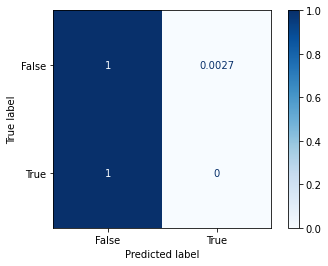

In [107]:
# Matrice de confusion des données X_test sur lesquelles on fait la prédiction et des données Y_test.
draw_confusion_matrix(Y_test, svm, "")

No handles with labels found to put in legend.


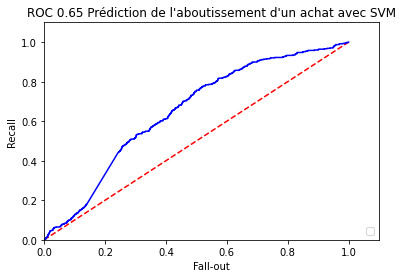

In [108]:
draw_roc_curve(svm, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec SVM")

### 7.4. GradientBoostingClassifier (CLF)

In [68]:
import sys
from sklearn.model_selection   import GridSearchCV
from sklearn.neighbors         import KNeighborsClassifier
from sklearn                   import ensemble
from sklearn                   import datasets
from sklearn.utils             import shuffle
from sklearn.metrics           import mean_squared_error
from sklearn.datasets          import make_hastie_10_2
from sklearn.ensemble          import GradientBoostingClassifier
    
import pickle

In [69]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [70]:
def clf_grid_search(df, Y, key):
    """
    Réglage des hyper-paramètres du Classifier Gradient Boosting
    """
    parameters = {'n_estimators': [5, 10, 20, 50]            ,
                  'max_depth': [None]                        ,
                  'min_samples_split': [2, 3]                   ,
                  'min_samples_leaf' : [1, 2, 3]              ,
                  'max_depth' : [3, 4, 5, 8]                     ,
                  'learning_rate': [0.01, 0.05, 0.1]       ,
                  'loss': ['deviance', 'exponential']               }
    
    grid_type = "clf_grid_search"
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search Grid
    """
    print (parameters);sys.stdout.flush()
    
    
    grid = GridSearchCV(GradientBoostingClassifier(), parameters, verbose=1)
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1
    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()
    modeles[key] = {"score" : grid.best_score_, "estimator" : grid.best_estimator_, "params" : grid.best_params_}
    
    return grid

In [71]:
start_time = print_time()

clf = clf_grid_search(X_train, Y_train, "CLF")

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 clf_grid_search
{'n_estimators': [5, 10, 20, 50], 'max_depth': [3, 4, 5, 8], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3], 'learning_rate': [0.01, 0.05, 0.1], 'loss': ['deviance', 'exponential']}
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 32.3min finished


 best_score_ = 0.85 with =  GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=8,
                           min_samples_leaf=3, min_samples_split=3,
                           n_estimators=20) 

Duration time : 1939.105062007904



[[1. 0.]
 [1. 0.]]


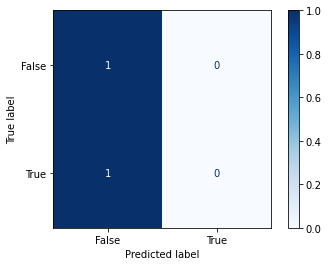

In [72]:
draw_confusion_matrix(Y_test, clf.best_estimator_, "")

No handles with labels found to put in legend.


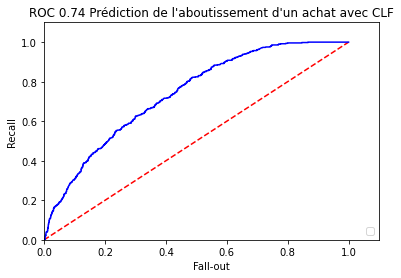

In [73]:
draw_roc_curve(clf, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec CLF")

### 7.5. RandomForest

In [74]:
import sys, pickle
from sklearn.ensemble          import RandomForestClassifier
from sklearn.model_selection   import GridSearchCV
from sklearn.metrics           import make_scorer
from sklearn.preprocessing     import label_binarize
from sklearn.multiclass        import OneVsRestClassifier

In [75]:
def RandomForest_grid_search(df, Y, key):
    """
    Réglage des hyper-paramètres du classifieur Random Forest
    """
    #grid search :

    parameters = {  "n_estimators"         : [ 10, 50, 100, 200 ], 
                    "min_samples_leaf"     : [  3,   1,  7 ],
                    "criterion"            : ["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["balanced", "balanced_subsample"]          ,
                    "warm_start"           : [False]           }

    
    grid_type = "RandomForestClassifier"
    
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search 
    """
    print (parameters);sys.stdout.flush()
    grid         = GridSearchCV(RandomForestClassifier(), parameters, verbose=1, scoring='f1_weighted')
    
    try :grid.fit(df, Y)
    except Exception as e : print ("[%s - 2] : %s"%(grid_type,e) )
    
    print (" best_score_ %s with =  %s "%( grid.best_score_,  grid.best_estimator_ ) ); sys.stdout.flush()    
    modeles[key] = {"score" : grid.best_score_, "estimator" : grid.best_estimator_, "params" : grid.best_params_}

    return grid.best_estimator_

In [76]:
start_time = print_time()

rf = RandomForest_grid_search(X_train, Y_train, "RF")
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 RandomForestClassifier
{'n_estimators': [10, 50, 100, 200], 'min_samples_leaf': [3, 1, 7], 'criterion': ['gini', 'entropy'], 'max_features': ['auto'], 'max_depth': [None], 'n_jobs': [-1], 'class_weight': ['balanced', 'balanced_subsample'], 'warm_start': [False]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.5min finished


 best_score_ 0.8047286778121487 with =  RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=3, n_jobs=-1) 

Duration time : 213.90076184272766


In [77]:
# On affiche les résultats de tous les modèles testés jusque maintenant.
modeles

{'KNN': {'score': 0.7827383595672632,
  'estimator': KNeighborsClassifier(),
  'params': {}},
 'CLF': {'score': 0.8471936035548799,
  'estimator': GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=8,
                             min_samples_leaf=3, min_samples_split=3,
                             n_estimators=20),
  'params': {'learning_rate': 0.05,
   'loss': 'exponential',
   'max_depth': 8,
   'min_samples_leaf': 3,
   'min_samples_split': 3,
   'n_estimators': 20}},
 'RF': {'score': 0.8047286778121487,
  'estimator': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                         min_samples_leaf=3, n_jobs=-1),
  'params': {'class_weight': 'balanced',
   'criterion': 'entropy',
   'max_depth': None,
   'max_features': 'auto',
   'min_samples_leaf': 3,
   'n_estimators': 100,
   'n_jobs': -1,
   'warm_start': False}}}


[[0.92942538 0.07057462]
 [0.73265306 0.26734694]]


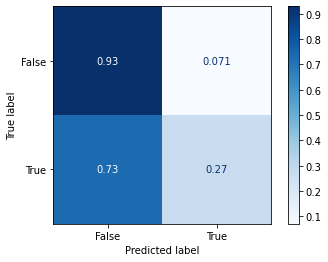

In [78]:
draw_confusion_matrix(Y_test, rf, "")

No handles with labels found to put in legend.


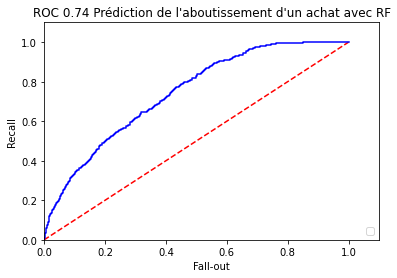

In [79]:
draw_roc_curve(rf, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec RF")

In [80]:
modeles

{'KNN': {'score': 0.7827383595672632,
  'estimator': KNeighborsClassifier(),
  'params': {}},
 'CLF': {'score': 0.8471936035548799,
  'estimator': GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=8,
                             min_samples_leaf=3, min_samples_split=3,
                             n_estimators=20),
  'params': {'learning_rate': 0.05,
   'loss': 'exponential',
   'max_depth': 8,
   'min_samples_leaf': 3,
   'min_samples_split': 3,
   'n_estimators': 20}},
 'RF': {'score': 0.8047286778121487,
  'estimator': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                         min_samples_leaf=3, n_jobs=-1),
  'params': {'class_weight': 'balanced',
   'criterion': 'entropy',
   'max_depth': None,
   'max_features': 'auto',
   'min_samples_leaf': 3,
   'n_estimators': 100,
   'n_jobs': -1,
   'warm_start': False}}}

### 7.6. Conclusions

Au final, le meilleur modèle est le Gradient Boosting Classifier (CLF) avec un score de 0.85.

# Etape 8 : Modèles avec online_shoppers_intention_edited

In [81]:
# Créer un nouveau dataframe df_online_shoppers_edited qui reprend le dataframe online_shoppers_intention_edited
# dans lequel on retire les lignes contenant des valeurs NA 
# Le paramètre "inplace = False" signifie que l'on ne souhaite pas modifier le dataframe d'origine online_shoppers_intention

df_online_shoppers_edited = online_shoppers_intention_edited.dropna(axis = 0, inplace = False)
df_online_shoppers_edited.shape

(12330, 17)

In [82]:
# Pour exécuter les modèles, nous avons besoin que nos variables soient des nombres ou des booléens
# Il faut remplacer les variables qui sont des chaînes de caractères

In [83]:
# On supprime la colonne Month, car il y a déjà la colonne MonthNumber qui correspond aux indexs de Month
df_online_shoppers_edited.drop(['Month'], axis='columns', inplace=True)

In [84]:
# On transforme Visitor_type : Returning_Visitor en 0, New_Visitor en 1 et Other en 2
df_online_shoppers_edited['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[0,1,2], inplace = True)

In [85]:
df_online_shoppers_edited.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,MonthNumber,TotalPages,TotalDuration
0,0,0.0,0,0.0,1,0.0,0.0,1,1,1,0,False,False,2,1,0.0
117,0,0.0,0,0.0,11,577.0,0.2,2,2,3,0,False,False,2,11,577.0
118,0,0.0,0,0.0,8,95.0,0.0,4,1,3,0,False,False,2,8,95.0
119,0,0.0,0,0.0,6,301.5,0.0,2,4,9,0,False,False,2,6,301.5
120,0,0.0,0,0.0,6,243.0,0.0,2,4,4,0,False,False,2,6,243.0


### 8.1. Séparer le jeu d'apprentissage du jeu de test

In [86]:
Y = df_online_shoppers_edited['Revenue']
X = df_online_shoppers_edited.drop('Revenue', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9247, 15)
(3083, 15)
(9247,)
(3083,)


### 8.2. KNeighbors Classifier

In [88]:
start_time = print_time()

knn = knn_grid_search(X_train, Y_train, "KNN2")

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 knn_grid_search
{'n_neighbors': [2, 3, 5, 8, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 3]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 best_score_ = 0.78 with =  KNeighborsClassifier() 

Duration time : 1.0322396755218506


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished



[[0.95702226 0.04297774]
 [0.90985325 0.09014675]]


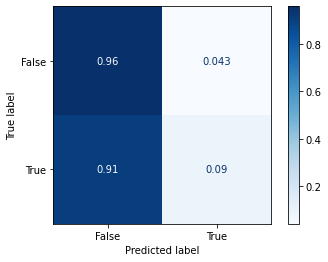

In [89]:
# Matrice de confusion des données X_test sur lesquelles on fait la prédiction et des données Y_test.
draw_confusion_matrix(Y_test, knn.best_estimator_, "")

In [90]:
# La  matrice de confusion indique que les valeurs 0 (achats non aboutis) sont bien prédites 
# mais les valeurs 1 (achats aboutis) ne sont pas bien prédites

No handles with labels found to put in legend.


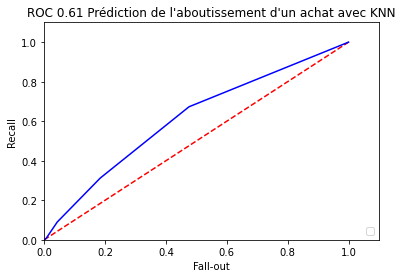

In [91]:
draw_roc_curve(knn, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec KNN")

### 8.3. C-Support Vector Classification

In [92]:
# Pour le C-Support Vector Classification, nous allons tester différents paramètres.
# La fonction utilisée ci-dessous svm_grid_search
# permet de faire varier les paramètres.

In [93]:
start_time = print_time()

svm = svm_grid_search(X_train, Y_train, "SVM2")

end_time = print_time()

print ("\nDuration time :", end_time - start_time)

------------------------------ 
 svm_grid_search
{'C': [1.0, 0.5], 'kernel': ['rbf'], 'degree': [2, 3], 'gamma': [0.01, 0.1], 'coef0': [0.0], 'shrinking': [True], 'probability': [True], 'tol': [0.001], 'cache_size': [10], 'class_weight': [None], 'max_iter': [-1], 'random_state': [None]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 80.5min finished


 best_score_ = 0.78 with =  SVC(cache_size=10, degree=2, gamma=0.01, probability=True) 

Duration time : 4922.957870721817



[[0.99731389 0.00268611]
 [1.         0.        ]]


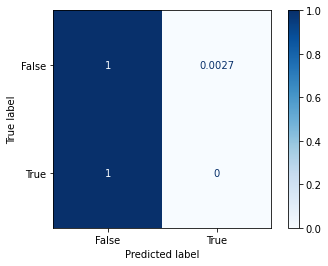

In [94]:
# Matrice de confusion des données X_test sur lesquelles on fait la prédiction et des données Y_test.
draw_confusion_matrix(Y_test, svm, "")

No handles with labels found to put in legend.


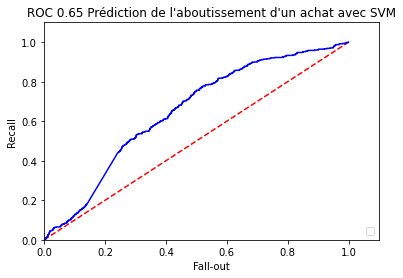

In [95]:
draw_roc_curve(svm, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec SVM")

### 8.4. GradientBoostingClassifier (CLF)

In [96]:
start_time = print_time()

clf = clf_grid_search(X_train, Y_train, "CLF2")

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 clf_grid_search
{'n_estimators': [5, 10, 20, 50], 'max_depth': [3, 4, 5, 8], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3], 'learning_rate': [0.01, 0.05, 0.1], 'loss': ['deviance', 'exponential']}
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 29.3min finished


 best_score_ = 0.85 with =  GradientBoostingClassifier(loss='exponential', max_depth=8, min_samples_leaf=3,
                           min_samples_split=3, n_estimators=50) 

Duration time : 1762.0425753593445



[[0.98695318 0.01304682]
 [0.93710692 0.06289308]]


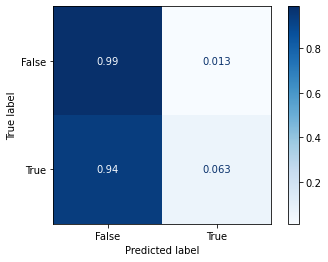

In [97]:
draw_confusion_matrix(Y_test, clf.best_estimator_, "")

No handles with labels found to put in legend.


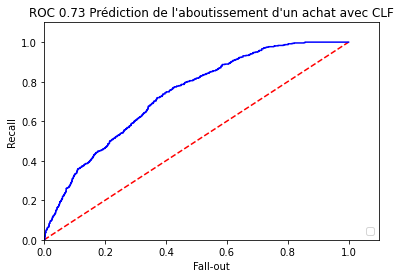

In [98]:
draw_roc_curve(clf, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec CLF")

### 8.5. RandomForest

In [99]:
start_time = print_time()

rf = RandomForest_grid_search(X_train, Y_train, "RF2")
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

------------------------------ 
 RandomForestClassifier
{'n_estimators': [10, 50, 100, 200], 'min_samples_leaf': [3, 1, 7], 'criterion': ['gini', 'entropy'], 'max_features': ['auto'], 'max_depth': [None], 'n_jobs': [-1], 'class_weight': ['balanced', 'balanced_subsample'], 'warm_start': [False]}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.5min finished


 best_score_ 0.8110281570440314 with =  RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       n_estimators=50, n_jobs=-1) 

Duration time : 210.58329582214355



[[0.94128933 0.05871067]
 [0.77358491 0.22641509]]


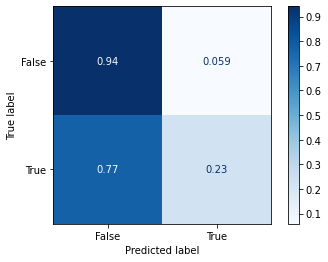

In [100]:
draw_confusion_matrix(Y_test, rf, "")

No handles with labels found to put in legend.


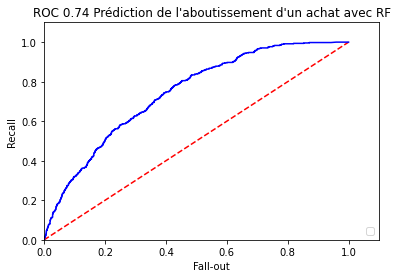

In [101]:
draw_roc_curve(rf, X_test, Y_test, "Prédiction de l'aboutissement d'un achat avec RF")

In [109]:
# On affiche les résultats de tous les modèles testés jusque maintenant.
modeles

{'KNN': {'score': 0.7827383595672632,
  'estimator': KNeighborsClassifier(),
  'params': {}},
 'CLF': {'score': 0.8471936035548799,
  'estimator': GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=8,
                             min_samples_leaf=3, min_samples_split=3,
                             n_estimators=20),
  'params': {'learning_rate': 0.05,
   'loss': 'exponential',
   'max_depth': 8,
   'min_samples_leaf': 3,
   'min_samples_split': 3,
   'n_estimators': 20}},
 'RF': {'score': 0.8047286778121487,
  'estimator': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                         min_samples_leaf=3, n_jobs=-1),
  'params': {'class_weight': 'balanced',
   'criterion': 'entropy',
   'max_depth': None,
   'max_features': 'auto',
   'min_samples_leaf': 3,
   'n_estimators': 100,
   'n_jobs': -1,
   'warm_start': False}},
 'KNN2': {'score': 0.7807043497048349,
  'estimator': KNeighborsClassifier(),
  'params': {}},
 'SVM2': {'sco

## 8.6. Conclusion

Le meilleur modèle est le Gradient Boosting Classifier (CLF) avec un score de 0.84.

# Conclusions

Au final, après avoir testé sur les deux datasets (avec et sans les nouvelles colonnes), on se rend compte que les résultats sont quasiment identiques (0.84, 0.85). Le modèle le plus performant dans les deux cas est le CLF. 

Le meilleur modèle final est le Gradient Boosting Classifier (CLF) appelé avec les paramètres :
- learning_rate : 0.1
- loss : exponential
- max_depth: 8
- min_samples_leaf: 3
- min_samples_split: 3
- n_estimators: 20 

Le reste des paramètres correspondants aux paramètres par défaut.
Le score obtenu est de 0.85.  

Ce que nous remarquons en observant les matrices de confusion, c'est que dû à la faible proportion des Revenue = True dans le dataset, les prédictions sont plutôt médiocres quand Revenue = True.
Ce phénomène se manifeste sur tous les modèles testés.

## Annexe - Récuperation du meilleur modèle en local sous format .pkl